## ĐỌC DỮ LIỆU VÀ KHÁM PHÁ DỮ LIỆU

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/raw/weather_raw.csv")

### 1. Tổng quan dữ liệu

In [200]:
# số dòng/cột
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])

Số dòng: 117229
Số cột: 10


In [201]:
# xem qua thông tin của 5 dòng đầu tiên
df.head(5)

,latitude,longitude,datetime,temperature (C degree),humidity (%),precipitation (mm),windspeed (km/h),winddirection (degrees),pressure (hPa),dewpoint (C degree)
0,16.58,107.61,2024-01-01 00:00:00,21.8,99.0,0.0,3.6,230.0,1016.9,21.6
1,16.58,107.61,2024-01-01 01:00:00,22.0,94.0,0.0,1.8,220.0,1017.0,21.0
2,16.58,107.61,2024-01-01 02:00:00,23.0,94.0,0.2,3.6,280.0,1017.0,22.0
3,16.58,107.61,2024-01-01 03:00:00,24.3,94.0,0.3,5.4,350.0,1017.6,23.3
4,16.58,107.61,2024-01-01 04:00:00,24.0,94.0,0.2,3.6,350.0,1017.0,23.0


In [202]:
# xem các cột có kiểu dữ liệu gì
cols = df.columns
print(df.dtypes)

latitude                   float64
longitude                  float64
datetime                    object
temperature (C degree)     float64
humidity (%)               float64
precipitation (mm)         float64
windspeed (km/h)           float64
winddirection (degrees)    float64
pressure (hPa)             float64
dewpoint (C degree)        float64
dtype: object


Hiện tại ngoại trừ datetime các cột còn lại có giá trị hợp lý, không có điểm bất thường. Tiến hành chuẩn hóa đưa datetime ở kiểu dữ liệu object thành datetime

In [203]:
# định dạng datetime từ kiểu object thành kiểu datetime
df['datetime'] = pd.to_datetime(df['datetime'])
print(df['datetime'].dtypes)

datetime64[ns]


### 2. Kiểm tra dữ liệu thiếu

In [204]:
missing_table = pd.DataFrame({
    "Số ô thiếu": df.isnull().sum(),
    "Tỷ lệ thiếu %": df.isnull().mean() * 100
})

print(missing_table)

                         Số ô thiếu  Tỷ lệ thiếu %
latitude                          0       0.000000
longitude                         0       0.000000
datetime                          0       0.000000
temperature (C degree)            7       0.005971
humidity (%)                     21       0.017914
precipitation (mm)             2947       2.513883
windspeed (km/h)                 14       0.011942
winddirection (degrees)        3472       2.961724
pressure (hPa)                 4137       3.528990
dewpoint (C degree)              28       0.023885


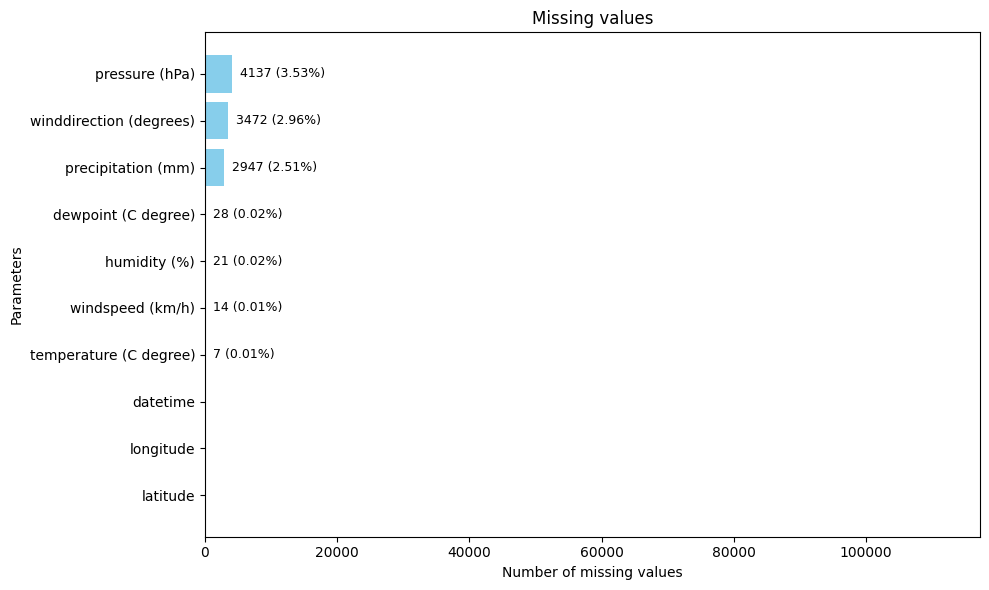

In [205]:
missing_table_sorted = missing_table.sort_values("Số ô thiếu")

plt.figure(figsize=(10, 6))
bars = plt.barh(missing_table_sorted.index, missing_table_sorted["Số ô thiếu"], color='skyblue')

total_rows = len(df)
plt.xlim(0, total_rows) 

for bar, missing in zip(bars, missing_table_sorted["Số ô thiếu"]):
    percent = (missing / total_rows) * 100
    
    if missing > 0:
        label = f'{missing} ({percent:.2f}%)'
        plt.text(bar.get_width() + (total_rows * 0.01),
                 bar.get_y() + bar.get_height()/2, 
                 label, 
                 va='center', 
                 fontsize=9)

plt.xlabel("Number of missing values")
plt.ylabel("Parameters")
plt.title(f"Missing values")
plt.tight_layout()
plt.show()

In [206]:
# kiểm tra nội dung có bị trùng lặp hay không 
print("Số dòng bị trùng:", df.duplicated().sum())

Số dòng bị trùng: 0


### 3. Thống kê mô tả

Dựa trên lý thuyết ta có các ngưỡng thường xuất hiện của các yếu tố thời tiết ở Huế như sau:
* Temperature (°C) : 10-40
* Humidity (%) : 40-100
* Wind speed (km/h) : 0-120
* Precipitation (mm) : 0-300
* Pressure : 980-1030
* Dew point (°C) : 5-30

In [207]:
# tiến hành kiểm tra các khoảng giá trị của các yếu tố thời tiết có hợp lí chưa
cols_to_drop = ["latitude", "longitude"]

desc_table = pd.DataFrame({
    "Min": df.drop(columns=cols_to_drop).min(numeric_only=True),
    "Max": df.drop(columns=cols_to_drop).max(numeric_only=True),
    "Mean": df.drop(columns=cols_to_drop).mean(numeric_only=True),
    "Std": df.drop(columns=cols_to_drop).std(numeric_only=True)
})

print(desc_table)


                           Min     Max         Mean        Std
temperature (C degree)    13.6    42.0    26.221492   4.677284
humidity (%)               3.0   100.0    81.275143  13.654908
precipitation (mm)         0.0    35.8     0.347182   1.306134
windspeed (km/h)           0.0   245.0     8.092792   6.236719
winddirection (degrees)    0.0   360.0   195.124608  97.759367
pressure (hPa)           991.0  1027.8  1010.005855   5.865269
dewpoint (C degree)        9.9    28.3    22.440662   2.923475


So sánh dữ liệu từ bộ data so với range ta thấy:
- Huminity 3% rất phi thực tế ở Huế
- Wind speed 245 km/h là cực kỳ bất thường ở Huế (thường là siêu bão cấp 16-17) mà Huế chưa từng có gió có cường độ như thế.
- Temparature 42 độ C là rất cao, sát ngưỡng bất thường => Huế rất hiếm khi vượt 40 độ C 

Ngoài ra các giá trị còn lại khá hợp lý, không có điểm bất thường nào khác cần lưu ý 

=> Tiến hành phân tích sâu các yếu tố được cho là bất thường đã đề cập phía trên

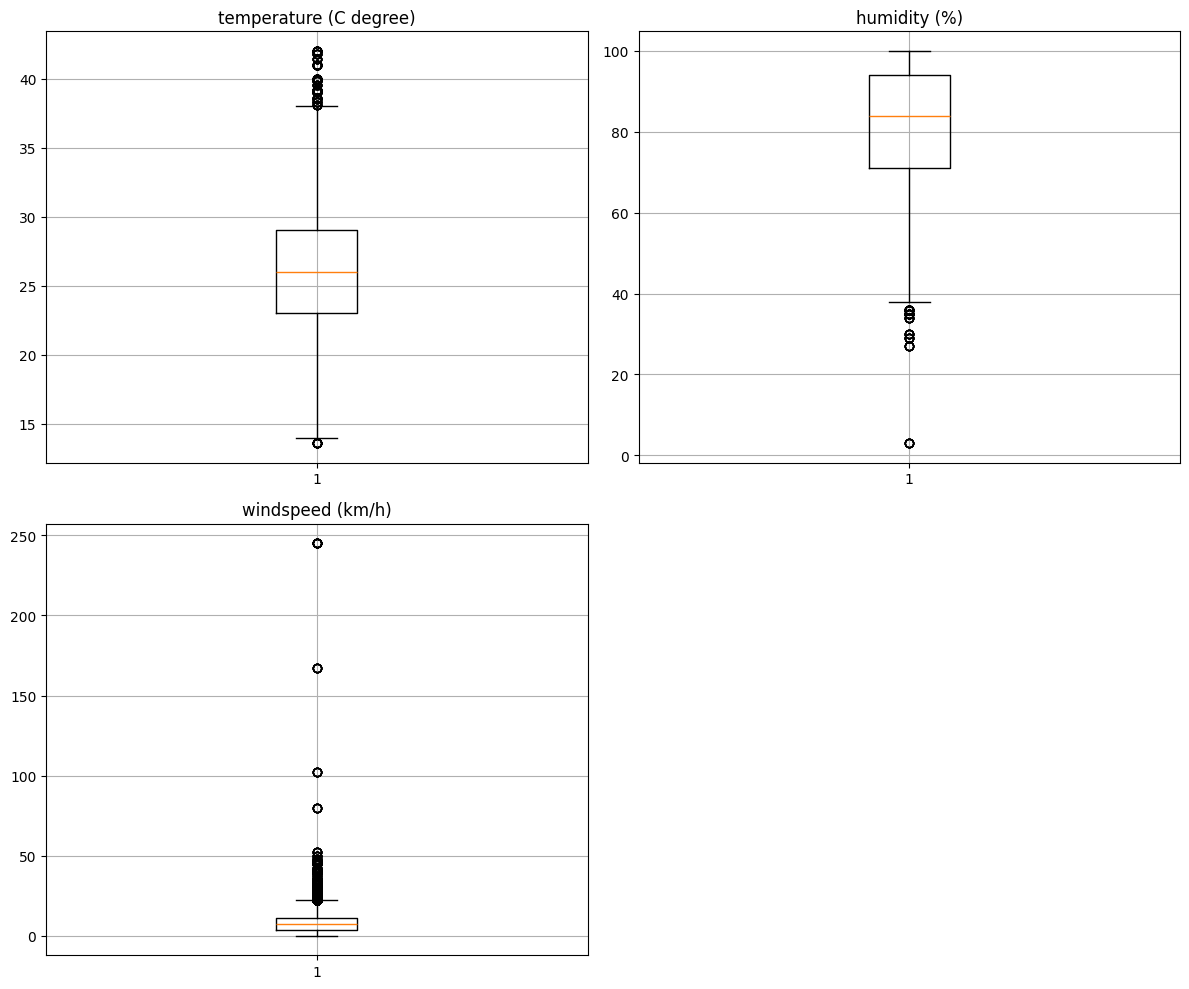

In [208]:
cols = [
    "temperature (C degree)",
    "humidity (%)",
    "windspeed (km/h)"
]

n_cols = 2                     
n_rows = (len(cols) + 1) // 2

plt.figure(figsize=(12, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [209]:
rows_humidity_3 = df[df["humidity (%)"] <= 3.0]
print("Số dòng có humidity = 3%:", len(rows_humidity_3))

print(rows_humidity_3)


Số dòng có humidity = 3%: 7
        latitude  longitude            datetime  temperature (C degree)  \
15113      16.58     107.61 2025-09-22 18:00:00                     NaN   
31860      16.52     107.59 2025-09-22 18:00:00                     NaN   
48607      16.47     107.62 2025-09-22 18:00:00                     NaN   
65354      16.43     107.58 2025-09-22 18:00:00                     NaN   
82101      16.38     107.62 2025-09-22 18:00:00                     NaN   
98848      16.53     107.67 2025-09-22 18:00:00                     NaN   
115595     16.44     107.65 2025-09-22 18:00:00                     NaN   

        humidity (%)  precipitation (mm)  windspeed (km/h)  \
15113            3.0                 0.0               6.0   
31860            3.0                 0.0               6.0   
48607            3.0                 0.0               6.0   
65354            3.0                 0.0               6.0   
82101            3.0                 0.0               6.0   

Sau khi liệt kê các dòng dữ liệu liên quan đến sự bất thường của độ ẩm (<=3%) thì ta nhận thấy các thông số về nhiệt độ và điểm sương đều trống. Cho thấy các thông tin trong dòng dữ liệu này không đủ để phục vụ việc phân tích sau này 

=> Tiến hành loại bỏ các cột này

In [210]:
df.drop(df[df["humidity (%)"] <= 3].index, inplace=True)
print("Số dòng còn lại:", len(df))
print("Còn humidity <= 3% không?", (df["humidity (%)"] <= 3).any())

Số dòng còn lại: 117222
Còn humidity <= 3% không? False


In [211]:
# số dòng chứa dữ liệu bất thường của tốc độ gió
rows_windspeed = df[df["windspeed (km/h)"] > 120]
print("Số dòng có windspeed >120:", len(rows_windspeed))

print(rows_windspeed)

Số dòng có windspeed >120: 21
        latitude  longitude            datetime  temperature (C degree)  \
15813      16.58     107.61 2025-10-22 02:00:00                    23.0   
15974      16.58     107.61 2025-10-28 19:00:00                    25.0   
16480      16.58     107.61 2025-11-18 22:00:00                    21.0   
32560      16.52     107.59 2025-10-22 02:00:00                    23.0   
32721      16.52     107.59 2025-10-28 19:00:00                    25.0   
33227      16.52     107.59 2025-11-18 22:00:00                    21.0   
49307      16.47     107.62 2025-10-22 02:00:00                    23.0   
49468      16.47     107.62 2025-10-28 19:00:00                    25.0   
49974      16.47     107.62 2025-11-18 22:00:00                    21.0   
66054      16.43     107.58 2025-10-22 02:00:00                    23.0   
66215      16.43     107.58 2025-10-28 19:00:00                    25.0   
66721      16.43     107.58 2025-11-18 22:00:00                    21.

In [212]:
rows_temp = df[df["temperature (C degree)"] >40]
print("Số dòng có temperature:", len(rows_temp))

print(rows_temp)

Số dòng có temperature: 77
        latitude  longitude            datetime  temperature (C degree)  \
2784       16.58     107.61 2024-04-26 04:00:00                    41.0   
2785       16.58     107.61 2024-04-26 05:00:00                    41.0   
2809       16.58     107.61 2024-04-27 05:00:00                    41.0   
2810       16.58     107.61 2024-04-27 06:00:00                    41.4   
2832       16.58     107.61 2024-04-28 04:00:00                    41.0   
...          ...        ...                 ...                     ...   
103362     16.44     107.65 2024-04-30 04:00:00                    41.0   
103363     16.44     107.65 2024-04-30 05:00:00                    42.0   
103364     16.44     107.65 2024-04-30 06:00:00                    41.8   
103387     16.44     107.65 2024-05-01 05:00:00                    42.0   
103388     16.44     107.65 2024-05-01 06:00:00                    42.0   

        humidity (%)  precipitation (mm)  windspeed (km/h)  \
2784      

## TIỀN XỬ LÝ DỮ LIỆU


In [213]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### 1. Điền dữ liệu thiếu

In [214]:
# nội suy tuyến tính cho các biến liên tục
df["temperature (C degree)"] = df["temperature (C degree)"].interpolate()
df["humidity (%)"] = df["humidity (%)"].interpolate()
df["windspeed (km/h)"] = df["windspeed (km/h)"].interpolate()
df["pressure (hPa)"] = df["pressure (hPa)"].interpolate()
df["dewpoint (C degree)"] = df["dewpoint (C degree)"].interpolate()

# hướng gió: đổi sang vector để nội suy
theta = np.deg2rad(df["winddirection (degrees)"])
u = np.cos(theta)
v = np.sin(theta)
u = pd.Series(u).interpolate()
v = pd.Series(v).interpolate()
df["winddirection (degrees)"] = (np.rad2deg(np.arctan2(v, u)) + 360) % 360

In [215]:
# fill missing precipitation bằng KNN Imputer
df = df.sort_values(by=['latitude', 'longitude', 'datetime'])

def fill_rain_knn(group):
    feature_cols = ['temperature (C degree)', 'humidity (%)', 'pressure (hPa)', 'dewpoint (C degree)', 'precipitation (mm)']
    
    data = group[feature_cols].copy()
    
    # scale data về 0-1 vì KNN tính khoảng cách, số to (áp suất 1000) sẽ lấn át giá trị bé
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    imputer = KNNImputer(n_neighbors=5, weights='distance') # k=5
    data_filled = imputer.fit_transform(data_scaled) # fill dữ liệu
    
    # đảo ngược scale, trả lại giá trị gốc 
    data_final = scaler.inverse_transform(data_filled)
    group['precipitation (mm)'] = data_final[:, -1] # gán vào df     
    
    return group

# fill lượng mưa theo từng lat/long
df_filled = df.groupby(['latitude', 'longitude'], group_keys=False).apply(fill_rain_knn)

# tránh giá trị âm
df_filled['precipitation (mm)'] = df_filled['precipitation (mm)'].clip(lower=0)

print("Số lượng missing sau khi nội suy:")
print(df_filled.isnull().sum())

Số lượng missing sau khi nội suy:
latitude                   0
longitude                  0
datetime                   0
temperature (C degree)     0
humidity (%)               0
precipitation (mm)         0
windspeed (km/h)           0
winddirection (degrees)    0
pressure (hPa)             0
dewpoint (C degree)        0
dtype: int64


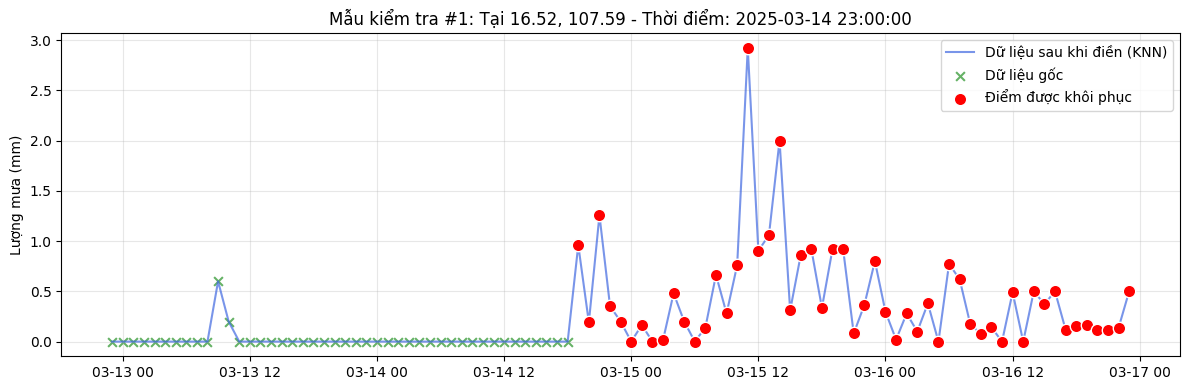

Mẫu #1 (2025-03-14 23:00:00): Giá trị gốc=NaN -> KNN điền=0.20 mm
------------------------------------------------------------


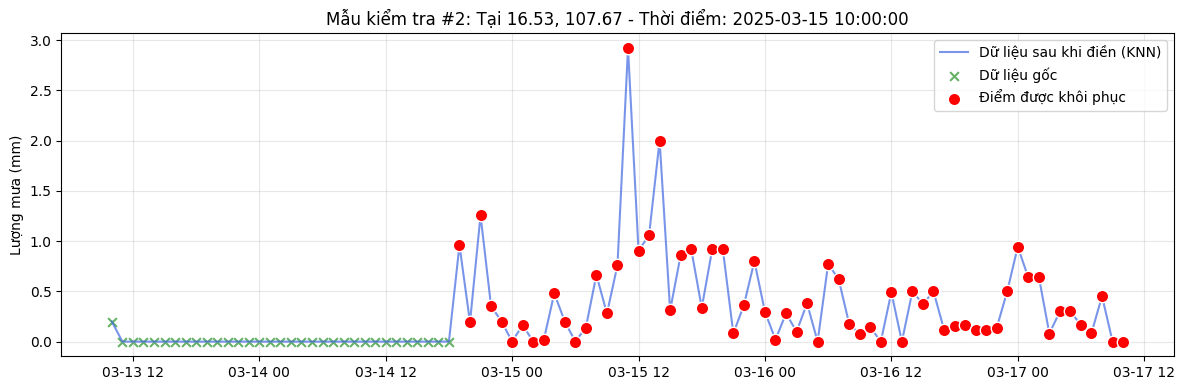

Mẫu #2 (2025-03-15 10:00:00): Giá trị gốc=NaN -> KNN điền=0.76 mm
------------------------------------------------------------


In [216]:
missing_indices = df[df['precipitation (mm)'].isnull()].index

if len(missing_indices) > 0:
    sample_indices = np.random.choice(missing_indices, 2, replace=False)
    
    for i, idx in enumerate(sample_indices):
        row = df.loc[idx]
        target_lat = row['latitude']
        target_long = row['longitude']
        center_time = row['datetime']
        
        # khung thời gian +/- 2 ngày quanh điểm thiếu 
        start_time = center_time - pd.Timedelta(days=2)
        end_time = center_time + pd.Timedelta(days=2)
        
        # lọc dữ liệu tại trạm đó, trong khoảng thời gian đó
        mask = (df_filled['latitude'] == target_lat) & \
               (df_filled['longitude'] == target_long) & \
               (df_filled['datetime'] >= start_time) & \
               (df_filled['datetime'] <= end_time)
        
        subset_filled = df_filled[mask]
        subset_raw = df[mask]
        
        plt.figure(figsize=(12, 4))
        
        # dữ liệu sau khi điền (đường line liên tục)
        plt.plot(subset_filled['datetime'], subset_filled['precipitation (mm)'], 
                 label='Dữ liệu sau khi điền (KNN)', color='royalblue', linewidth=1.5, alpha=0.7)
        
        # dữ liệu gốc
        plt.scatter(subset_raw['datetime'], subset_raw['precipitation (mm)'], 
                    label='Dữ liệu gốc', color='green', marker='x', s=40, alpha=0.6)
        
        # điểm vừa được khôi phục
        imputed_points = subset_filled.loc[subset_raw[subset_raw['precipitation (mm)'].isnull()].index]
        plt.scatter(imputed_points['datetime'], imputed_points['precipitation (mm)'], 
                    label='Điểm được khôi phục', color='red', s=80, zorder=5, edgecolors='white')
        
        plt.title(f'Mẫu kiểm tra #{i+1}: Tại {target_lat}, {target_long} - Thời điểm: {center_time}')
        plt.ylabel('Lượng mưa (mm)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        filled_val = df_filled.loc[idx, 'precipitation (mm)']
        print(f"Mẫu #{i+1} ({center_time}): Giá trị gốc=NaN -> KNN điền={filled_val:.2f} mm")
        print("-" * 60)

else:
    print("Không tìm thấy dữ liệu thiếu để kiểm tra.")

# nhận xét điiii


### 2. Trích xuất đặc trưng

In [217]:
# tháng và giờ
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

# mùa khô và mùa mưa
df['season'] = df['month'].apply(lambda x: 'Rainy' if 5 <= x <= 11 else 'Dry')

# label ngày/đêm
df['day_night'] = df['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# đổi lat-long thành id khu vực
df['location_id'] = df.groupby(['latitude', 'longitude']).ngroup() + 1
df = df.drop(columns=['latitude', 'longitude'])

df.sample(5)

,datetime,temperature (C degree),humidity (%),precipitation (mm),windspeed (km/h),winddirection (degrees),pressure (hPa),dewpoint (C degree),month,hour,season,day_night,location_id
56554,2024-09-20 09:00:00,30.4,74.0,1.0,7.2,0.0,1000.3,25.2,9,9,Rainy,Day,2
5572,2024-08-20 10:00:00,32.0,63.0,0.0,11.2,90.0,1005.0,24.1,8,10,Rainy,Day,7
37141,2024-06-01 05:00:00,32.0,75.0,1.0,11.2,30.0,1008.0,27.0,6,5,Rainy,Night,4
76673,2025-02-08 02:00:00,19.0,94.0,0.8,7.6,100.0,1021.0,18.0,2,2,Dry,Night,1
11493,2025-04-24 12:00:00,28.5,80.0,0.0,3.6,160.0,1006.3,24.7,4,12,Dry,Day,7


In [218]:
df.to_csv('data/processed/weather_processed.csv', index=False) # lưu file data đã xử lý

### 3. Chuẩn bị dữ liệu huấn luyện

In [219]:
# encoding
le = LabelEncoder()
df['season_encoded'] = le.fit_transform(df['season']) # Dry->0, Rainy->1
df['day_night_encoded'] = le.fit_transform(df['day_night']) # Day->0, Night->1

# chọn các feature (X) và target (y)
features = ['location_id', 'month', 'hour', 'temperature (C degree)', 'humidity (%)', 
            'pressure (hPa)', 'windspeed (km/h)', 'season_encoded', 'day_night_encoded']

X = df[features]
y = df['precipitation (mm)'] 

# tách tập dữ liệu: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")
print(X_train.head())

Kích thước tập train: (93777, 9)
Kích thước tập test: (23445, 9)
       location_id  month  hour  temperature (C degree)  humidity (%)  \
38964            4      8     4                    37.0          45.0   
4143             7      6    21                    26.8          93.0   
9940             7      2    17                    23.0          83.0   
22799            5      9    11                    30.0          75.0   
15824            7     10    13                    23.0          89.0   

       pressure (hPa)  windspeed (km/h)  season_encoded  day_night_encoded  
38964          1005.0               7.6               1                  1  
4143           1002.2               1.8               1                  1  
9940           1018.0              13.0               0                  0  
22799          1004.0              11.2               1                  0  
15824          1012.0              20.0               1                  0  


In [220]:
train_df = X_train.copy()
train_df['precipitation (mm)'] = y_train

test_df = X_test.copy()
test_df['precipitation (mm)'] = y_test

# lưu file
train_df.to_csv('data/processed/train_data.csv', index=False)
test_df.to_csv('data/processed/test_data.csv', index=False)